## Bibliotecas e Configurações Gerais
Centralização das bibliotecas usadas e configurações globais

- set_option: para não limitar no print a quantidade de linhas nem de colunas.

- plt: biblioteca para criar gráficos. O plt.style.use define o estilo com grade escura de fundo. O plt.rcParams['figure.figsize'] define o tamanho padrão das figuras.

- sns: biblioteca de visualização estatística. O sns.set_palette define a paleta de cores padrão como "husl" (Hue-Saturation-Lightness), que é um sistema de cores que gera cores alegres e bem diferenciadas entre si.

In [9]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 29.8 MB/s  0:00:003.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 37.9 MB/s  0:00:000.3 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [42]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import warnings
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Conexão com o Banco de Dados
Primeiro, conectamos ao banco de dados e realizamos um SELECT na tabela Acidente, transferindo os dados para um dataframe onde serão feitas as análises.

Logo após a abertura, verificamos as informações gerais:
- Quantidade de linhas
- Colunas: tipos e quantidade de valores não nulos

In [13]:
conn_params = {
    "host": "localhost",
    "database": "cat_db",
    "user": "admin",
    "password": "admin",
    "port": 5433
}

conn = psycopg2.connect(**conn_params)

df = pd.read_sql("SELECT * FROM ACIDENTE", conn)

conn.close()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145888 entries, 0 to 145887
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   agente_causador_acidente   145888 non-null  object
 1   data_acidente_referencia   145888 non-null  object
 2   cbo_codigo_descricao       145888 non-null  object
 3   cid_10                     145888 non-null  object
 4   cnae_empregador            145888 non-null  int64 
 5   cnae_empregador_descricao  145692 non-null  object
 6   municipio_empregador       145888 non-null  object
 7   natureza_lesao             145888 non-null  object
 8   parte_corpo_atingida       145888 non-null  object
 9   sexo                       145888 non-null  object
 10  tipo_acidente              145888 non-null  object
 11  uf_municipio_acidente      145888 non-null  object
 12  uf_municipio_empregador    145888 non-null  object
 13  data_nascimento            145888 non-null  

## Análise Inicial

Utilizando a função describe(), é possível observar o impacto positivo da limpeza de dados em comparação com a análise dos dados brutos.

In [14]:
df.describe(include='all')

,agente_causador_acidente,data_acidente_referencia,cbo_codigo_descricao,cid_10,cnae_empregador,cnae_empregador_descricao,municipio_empregador,natureza_lesao,parte_corpo_atingida,sexo,tipo_acidente,uf_municipio_acidente,uf_municipio_empregador,data_nascimento,data_emissao_cat
count,145888,145888,145888,145888,145888.000000,145692,145888,145888,145888,145888,145888,145888,145888,145888,145888
unique,296,151,1647,1916,NaN,609,3288,29,45,4,3,17,28,17932,92
top,Impacto de Pes. Contra Objeto em Movimento,2023-03-13,Não identificado,Ferim de Dedos s/Lesao da Unha,NaN,Atividades de Atendimento Hospitalar,São Paulo,Fratura,Dedo,Masculino,Típico,Maranhão,São Paulo,1986-10-25,2023-03-28
freq,8685,2202,16392,7698,NaN,14471,13653,25782,33912,93236,108953,51142,51142,956,2639
mean,NaN,NaN,NaN,NaN,5073.521619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2671.834196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2833.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,4712.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,8121.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Em seguida, um amostra pequena das 5 primeiras linhas do arquivo

In [15]:
df.head(5)

,agente_causador_acidente,data_acidente_referencia,cbo_codigo_descricao,cid_10,cnae_empregador,cnae_empregador_descricao,municipio_empregador,natureza_lesao,parte_corpo_atingida,sexo,tipo_acidente,uf_municipio_acidente,uf_municipio_empregador,data_nascimento,data_emissao_cat
0,Rua e Estrada - Superficie Utilizada para Sus,2023-03-27,Administrador,Frat da Clavicula,4711,"Comercio Varejista de Mercadorias em Geral, c",São José dos Campos,Fratura,Ombro,Masculino,Trajeto,Maranhão,São Paulo,1977-06-05,2023-05-01
1,Impacto de Pes. Contra Objeto em Movimento,2023-04-30,Tec. de Enfermagem,Outr Locais Espec,8610,Atividades de Atendimento Hospitalar,Goiânia,"Outras Lesoes, Nic",Dedo,Feminino,Típico,Não identificado,Goiás,1992-08-08,2023-05-01
2,Agente Infeccioso ou Parasitario - Inclui Bac,2023-03-31,Analista de Desenv. de Sist.,Infecc p/Coronavirus Ne,8610,Atividades de Atendimento Hospitalar,Porto Alegre,Doenca Contagiosa ou Infecciosa (Tuberculos,Aparelho Respiratorio,Masculino,Doença,Não identificado,Rio Grande do Sul,1981-05-31,2023-04-16
3,"Chave de Porca ou de Abertura Regulavel, Chav",2023-04-15,Inst. Tubulações,Frat do Polegar,4322,"Instalacoes Hidraulicas, de Sistemas de Venti",Araguaína,Fratura,Dedo,Masculino,Típico,Sergipe,Tocantins,1994-10-20,2023-05-01
4,Rua e Estrada - Superficie Utilizada para Sus,2023-04-28,Oper. Máquina Cortadora (Minas e Pedre,Luxacao da Articulacao Acromioclavicula,2330,"Fabricacao de Artefatos de Concreto, Cimento,",Campos dos Goytacazes,Luxacao,"Tronco, Parte Multiplas (Qualquer Combinacao",Masculino,Trajeto,Tocantins,Rio de Janeiro,1993-08-21,2023-05-01


## Distribuição de Duplicidade e Nulos nas Colunas
Abaixo foram criados 2 gráficos: duplicidade e nulidade nas colunas.

Apenas a coluna CNAE do empregador apresenta valores nulos, confirmando a eficiência da limpeza dos dados realizada anteriormente.

A duplicidade aumentou de 14 para 35 linhas duplicadas. Esse aumento ocorreu devido à remoção de colunas desnecessárias, fazendo com que registros antes distintos se tornassem idênticos. Isso indica a necessidade de criar um campo de chave primária para identificar unicamente cada registro.

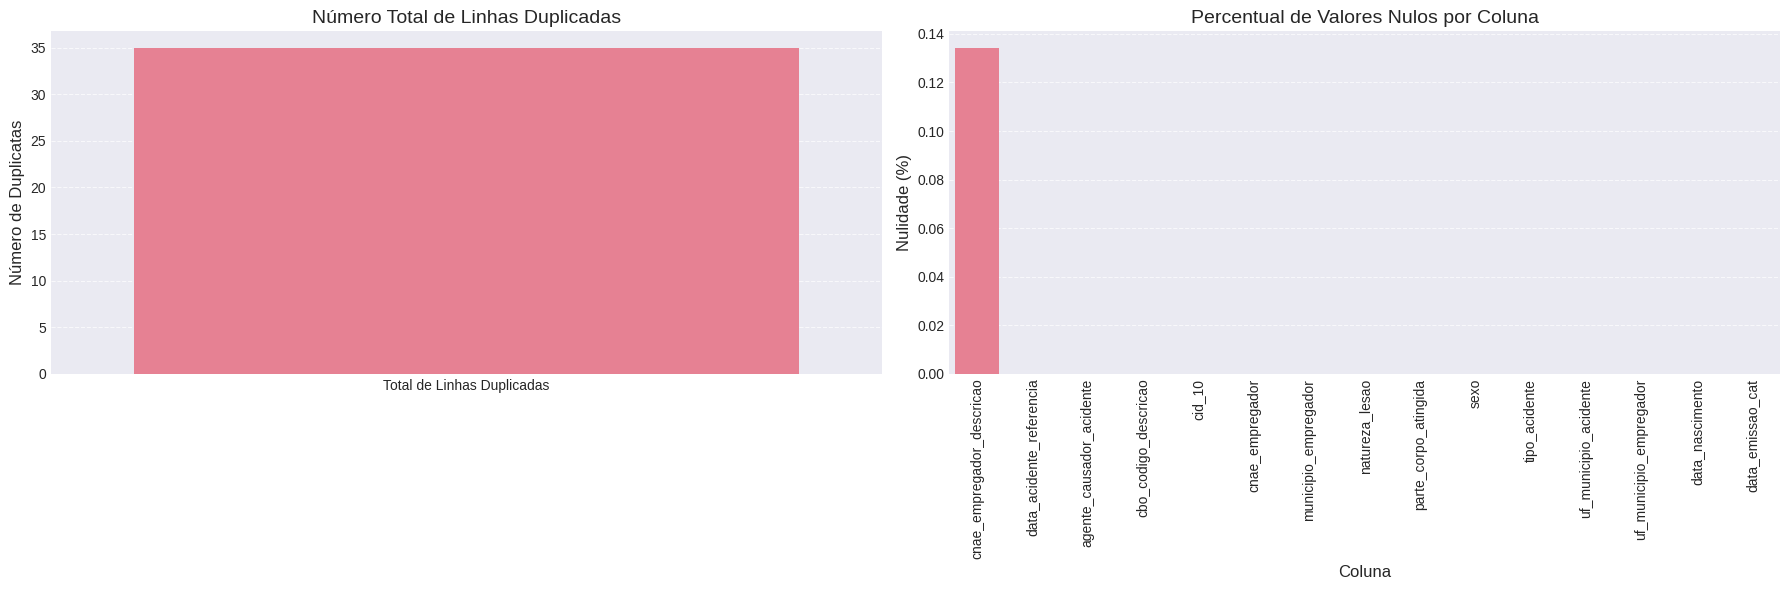

In [22]:
total_duplicated_rows = df.duplicated(keep=False).sum()

nullity_by_column = (df.isnull().sum() / len(df)) * 100

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=['Total de Linhas Duplicadas'], y=[total_duplicated_rows], ax=axes[0], palette='husl')
axes[0].set_title('Número Total de Linhas Duplicadas', fontsize=14)
axes[0].set_ylabel('Número de Duplicatas', fontsize=12)
axes[0].set_xlabel('', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x=nullity_by_column.sort_values(ascending=False).index, y=nullity_by_column.sort_values(ascending=False).values, ax=axes[1], palette='husl')
axes[1].set_title('Percentual de Valores Nulos por Coluna', fontsize=14)
axes[1].set_ylabel('Nulidade (%)', fontsize=12)
axes[1].set_xlabel('Coluna', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Análise de Correlação entre Variáveis Categóricas

V de Cramér é uma forma de medir o grau de associação entre dois campos categóricos (texto). 

![Interpretação V de Crámer](../../cramer-interpretation.png)

É feito em 5 passos:

1. Determinar qual coluna tem o menor número de categorias: Por exemplo, a coluna sexo tem 2 categorias (Masculino/Feminino) e tipo_acidente tem 3 categorias (Típico/Trajeto/Doença), o menor é 2.

2. Subtrair 1 do número de categorias neste campo: Seguindo o exemplo anterior, 2 - 1 = 1.

3. Multiplicamos o resultado pelo total de linhas: Se temos 10.000 acidentes registrados, então 1 × 10.000 = 10.000.

4. Dividimos o valor chi-quadrado pelo resultado anterior: O valor chi-quadrado é obtido do teste qui-quadrado de independência, que mede se existe relação estatística entre as variáveis. Por exemplo, se chi² = 250, então 250 ÷ 10.000 = 0.025.

5. Por fim, obtemos a raiz quadrada desse valor 0.025 = 0.158. Este é o valor de Cramér's V, que varia de 0 (nenhuma associação) a 1 (associação perfeita).

> IBM. Cramér's V. In: IBM Documentation - Cognos Analytics, versão 11.2.x. Disponível em: https://www.ibm.com/docs/pt-br/cognos-analytics/11.2.x?topic=terms-cramrs-v. Acesso em: 15 jan. 2026.

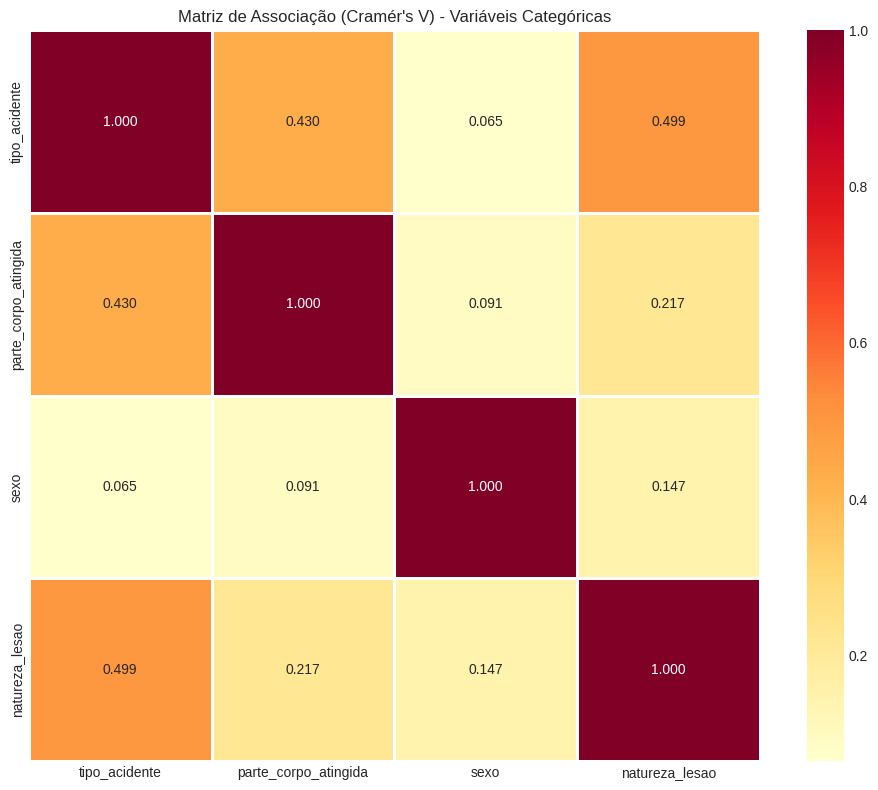

In [44]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1  #passo 1: confusion_matrix.shape, passo 2: min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) # passo 3: (n * min_dim), passo 4: chi2 / (n * min_dim) e passo 5: tudo

categorical_cols = ['tipo_acidente', 'parte_corpo_atingida', 'sexo', 
                    'natureza_lesao']

n_cols = len(categorical_cols)
cramers_matrix = pd.DataFrame(np.zeros((n_cols, n_cols)), 
                               columns=categorical_cols, 
                               index=categorical_cols)

for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i <= j:
            v = cramers_v(df[col1].fillna('NA'), df[col2].fillna('NA'))
            cramers_matrix.iloc[i, j] = v
            cramers_matrix.iloc[j, i] = v

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='YlOrRd', 
            fmt='.3f', square=True, linewidths=1)
plt.title("Matriz de Associação (Cramér's V) - Variáveis Categóricas")
plt.tight_layout()
plt.show()

Da matriz gerada podemos chegar a algumas correlações:
A análise de associação entre variáveis categóricas usando V de Cramér mostrou diferentes níveis de relação entre os campos.

A correlação mais forte foi entre tipo_acidente e natureza_lesao (V = 0,499), mostrando associação moderada. Isso indica que certos tipos de acidentes geram lesões específicas. A relação entre tipo_acidente e parte_corpo_atingida (V = 0,430) também foi moderada, ou seja, o tipo de acidente influencia qual parte do corpo é atingida.

Já parte_corpo_atingida e natureza_lesao tiveram associação fraca (V = 0,217), mostrando que diferentes partes do corpo podem sofrer lesões parecidas.

O resultado mais interessante foi a associação muito fraca entre sexo e todas as outras variáveis (V entre 0,065 e 0,147). Isso mostra que o sexo do trabalhador não determina o tipo de acidente, a parte do corpo atingida ou a natureza da lesão. Homens e mulheres sofrem acidentes similares quando expostos aos mesmos riscos.

## Análise Temporal
Aqui a ideia é focar na análise relacionada a datas, em especial a data do acidente. Assim podemos extrair informações o período do acidente (ano, mês e semana).

In [24]:
for col in ['data_acidente_referencia', 'data_nascimento']:
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y', errors='coerce')

df['Idade'] = (df['data_acidente_referencia'] - df['data_nascimento']).dt.days / 365.25
df['Ano'] = df['data_acidente_referencia'].dt.year
df['Mes'] = df['data_acidente_referencia'].dt.month
df['DiaSemana'] = df['data_acidente_referencia'].dt.day_name()


Em seguida, criamos 4 gráficos para visualizar a evolução e quantidade de acidentes por mês, por dia da semana e por ano.

Com os dados refinados após o processo ELT, o gráfico de evolução mensal ficou mais detalhado, pois agora utiliza dia, mês e ano completos, ao invés de apenas mês e ano. Isso foi possível pela escolha da coluna mais completa entre as 3 colunas de data disponíveis nos dados brutos.

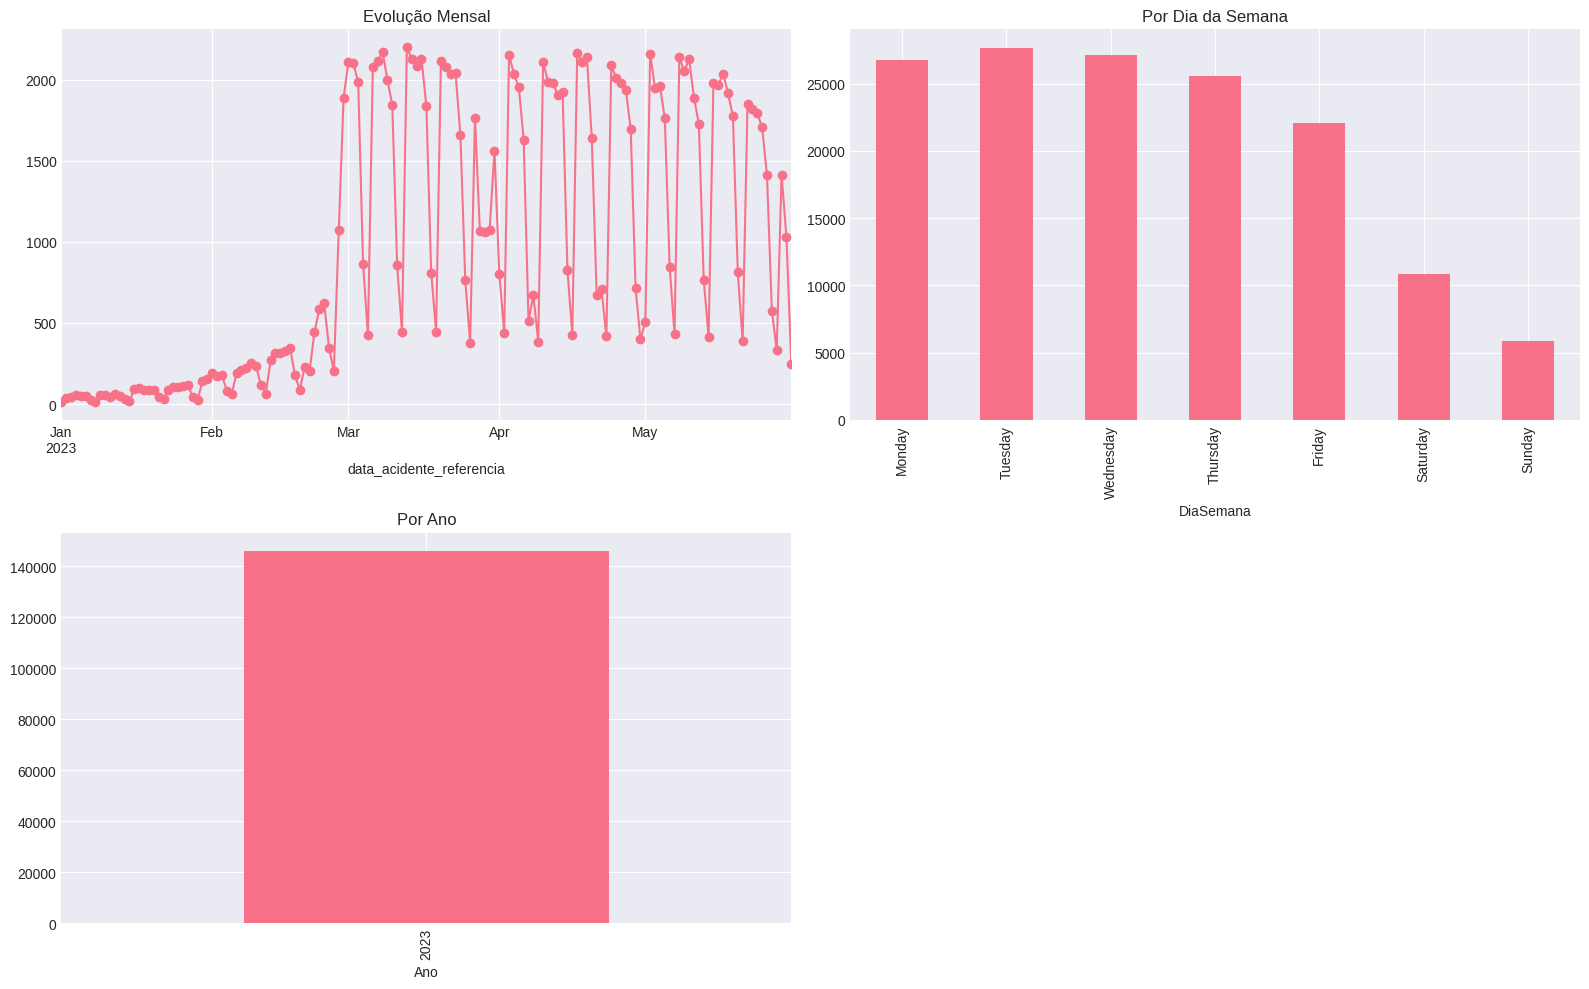

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

df['data_acidente_referencia'].value_counts().sort_index().plot(ax=axes[0,0], marker='o')
axes[0,0].set_title('Evolução Mensal')

ordem = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['DiaSemana'].value_counts().reindex(ordem).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Por Dia da Semana')

df['Ano'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Por Ano')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()


Primeiro, os dados foram agrupados pela data do acidente para contar quantos acidentes ocorreram em cada dia. Depois, foram removidas as datas nulas e os registros foram organizados em ordem temporal. Para fazermos a regressão linear, as datas foram convertidas em um número de dias a partir da primeira data. Essa variável representa o tempo, enquanto a quantidade diária de acidentes é o valor analisado.

Foi aplicada uma regressão linear para verificar a tendência dos acidentes ao longo do tempo. Com o modelo, calculmaos os valores previstos e os resíduos, que representam a diferença entre os valores reais e os estimados. Foram considerados outliers os dias em que o resíduo padronizado teve valor absoluto maior que 3. Por fim, foram analisados o R^2 do modelo, a tendência média de variação por dia de acidentes e a quantidade de outliers encontrados.

In [27]:
temp = df.groupby('data_acidente_referencia').size().reset_index(name='acidentes')
temp = temp.dropna().sort_values('data_acidente_referencia')
temp['dias'] = (temp['data_acidente_referencia'] - temp['data_acidente_referencia'].min()).dt.days

X_temp = temp['dias'].values.reshape(-1, 1)
y_temp = temp['acidentes'].values

model_temp = LinearRegression()
model_temp.fit(X_temp, y_temp)
y_pred_temp = model_temp.predict(X_temp)

res_temp = y_temp - y_pred_temp
res_pad_temp = (res_temp - res_temp.mean()) / res_temp.std()

outliers_temp = np.abs(res_pad_temp) > 3
temp['eh_outlier'] = outliers_temp

print(f'R^2 do modelo: {model_temp.score(X_temp, y_temp):.4f}')
print(f'Tendência: {model_temp.coef_[0]:.6f} acidentes/dia')
print(f'\n Outliers: {outliers_temp.sum()}')

R^2 do modelo: 0.3844
Tendência: 11.785884 acidentes/dia

 Outliers: 0


A análise de regressão linear mostrou um R^2 de 0.38, indicando uma tendência de aumento de cerca de 11,7 acidentes por dia ao longo do tempo. Não foram encontrados outliers nos dados temporais e todos os acidentes ocorreram em 2023, como podemos ver no gráfico abaixo.

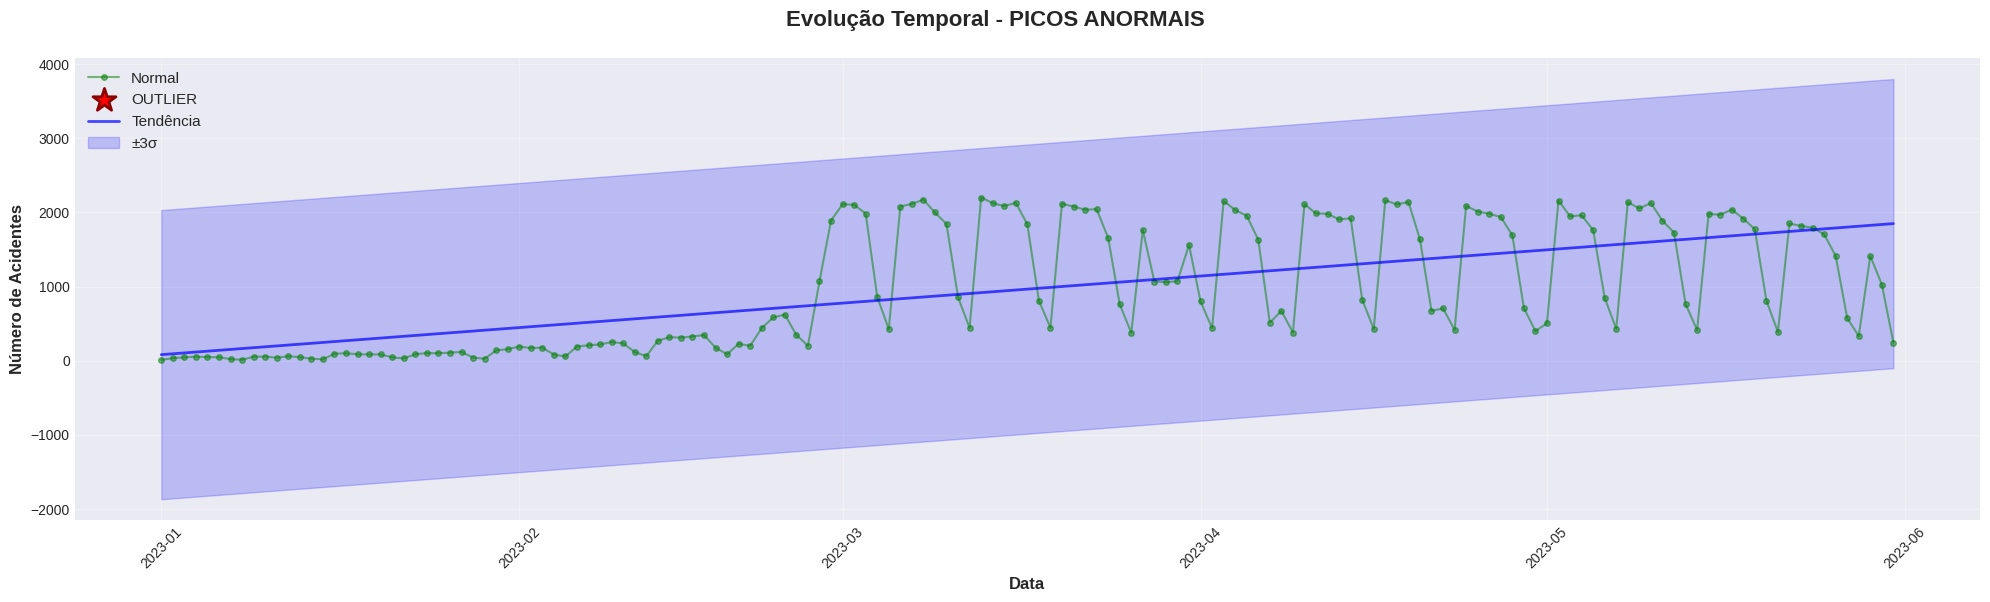

In [28]:
fig, axes = plt.subplots(figsize=(20, 6))
fig.suptitle('Evolução Temporal - PICOS ANORMAIS',
             fontsize=16, fontweight='bold', y=0.995)

axes.plot(temp['data_acidente_referencia'][~temp['eh_outlier']],
            temp['acidentes'][~temp['eh_outlier']],
            'o-', color='green', alpha=0.5, markersize=4, label='Normal')
axes.scatter(temp['data_acidente_referencia'][temp['eh_outlier']],
               temp['acidentes'][temp['eh_outlier']],
               s=300, color='red', marker='*', label='OUTLIER',
               edgecolors='darkred', linewidths=2, zorder=5)

dates_for_plot = temp['data_acidente_referencia'].values
axes.plot(dates_for_plot, y_pred_temp, 'b-', linewidth=2, label='Tendência', alpha=0.7)

std_temp = res_temp.std()
axes.fill_between(dates_for_plot, y_pred_temp - 3*std_temp, y_pred_temp + 3*std_temp,
                     alpha=0.2, color='blue', label='±3σ')

axes.set_xlabel('Data', fontweight='bold', fontsize=12)
axes.set_ylabel('Número de Acidentes', fontweight='bold', fontsize=12)
axes.legend(fontsize=11)
axes.grid(alpha=0.3)
axes.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Análise por Tipo de Acidente
Nessa análise vamos entender os tipos de acidentes e características associadas (CNAE, lesão, etc).

Aqui buscamos visualisar a distribuição a partir da recorrência dos tipos de acidentes. Os gráficos mostram a distribuição dos tipos de acidente em pizza e as 10 lesões mais frequentes em barras horizontais.

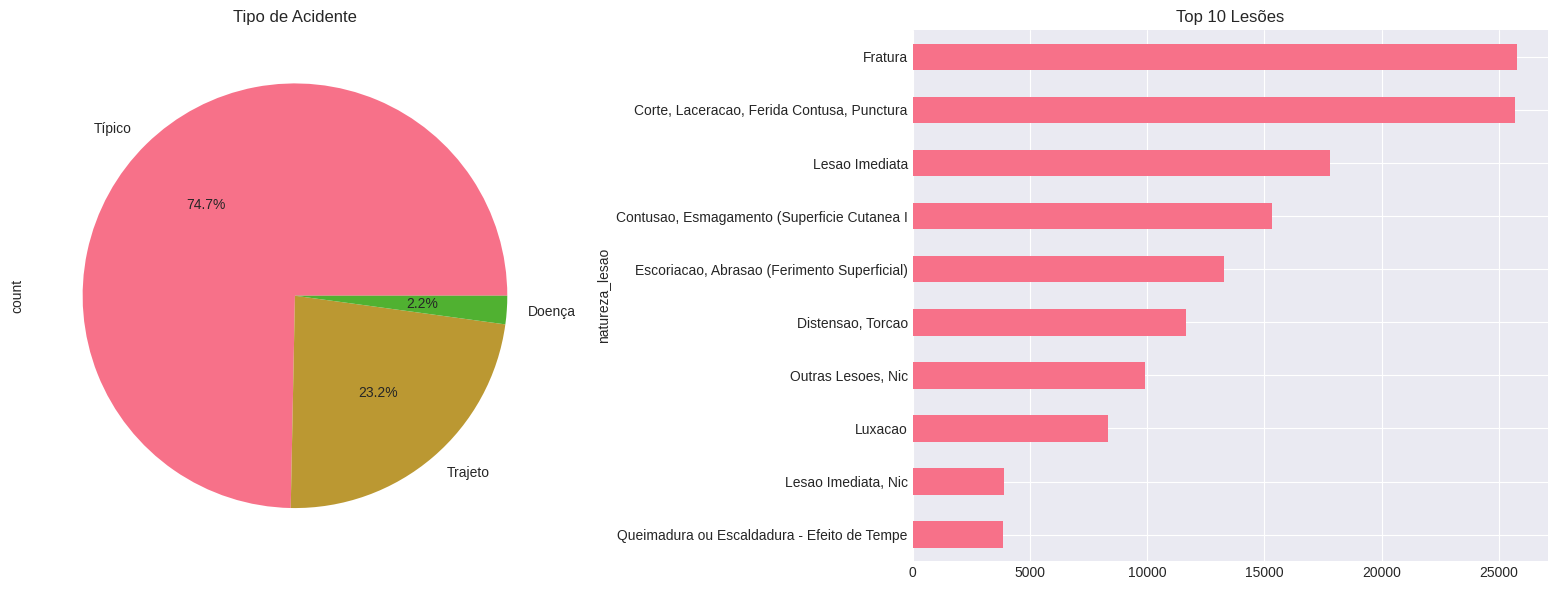

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df['tipo_acidente'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title('Tipo de Acidente')

top10_lesoes = df['natureza_lesao'].value_counts().head(10)
top10_lesoes[::-1].plot(kind='barh', ax=axes[1]) 
axes[1].set_title('Top 10 Lesões')


plt.tight_layout()
plt.show()

O gráfico abaixo mostra a relação entre CNAE e quantidade de acidentes em escala logarítmica, com a linha de regressão e os outliers identificados. Para identificar os CNAEs com comportamento anormal, aplicamos uma regressão linear em escala log, similar ao processo usado na análise temporal.

In [32]:
cnae_freq = df.groupby('cnae_empregador').size().reset_index(name='total_acidentes')
cnae_freq = cnae_freq.sort_values('total_acidentes').reset_index(drop=True)

X_cnae = np.arange(len(cnae_freq)).reshape(-1, 1)
y_cnae = cnae_freq['total_acidentes'].values

y_log = np.log(y_cnae)

model_cnae = LinearRegression()
model_cnae.fit(X_cnae, y_log)

y_pred_log = model_cnae.predict(X_cnae)
y_pred = np.exp(y_pred_log)

res_log = y_log - y_pred_log
res_pad_log = (res_log - res_log.mean()) / res_log.std()

outliers_cnae = np.abs(res_pad_log) > 3
cnae_freq['eh_outlier'] = outliers_cnae

print(f'R^2 (log): {model_cnae.score(X_cnae, y_log):.4f}')
print(f'Outliers: {outliers_cnae.sum()}')

if outliers_cnae.sum() > 0:
    top_outliers = cnae_freq[cnae_freq['eh_outlier']].nlargest(10, 'total_acidentes')
    print(top_outliers[['cnae_empregador', 'total_acidentes']].to_string(index=False))


R^2 (log): 0.9474
Outliers: 17
 cnae_empregador  total_acidentes
            8610            14471
            4711             6344
            4930             4159
            8411             3568
            1012             3381
            7411                1
            1628                1
            6391                1
            2209                1
            6312                1


A regressão linear em escala log apresentou um R^2 de 0.94, indicando um bom ajuste porque o valor está próximo de 1, o que significa que o modelo explica 95% da variação dos dados. Foram identificados 16 CNAEs como outliers, sendo os principais: 8610 (14471 acidentes), 4711 (6344), 4930 (4159), 8411 (3568) e 1012 (3381). Esses CNAEs se destacam porque têm uma quantidade de acidentes muito acima ou muito abaixo do esperado pela tendência geral, indicando setores com maior ou menor risco de acidentes do que a média.

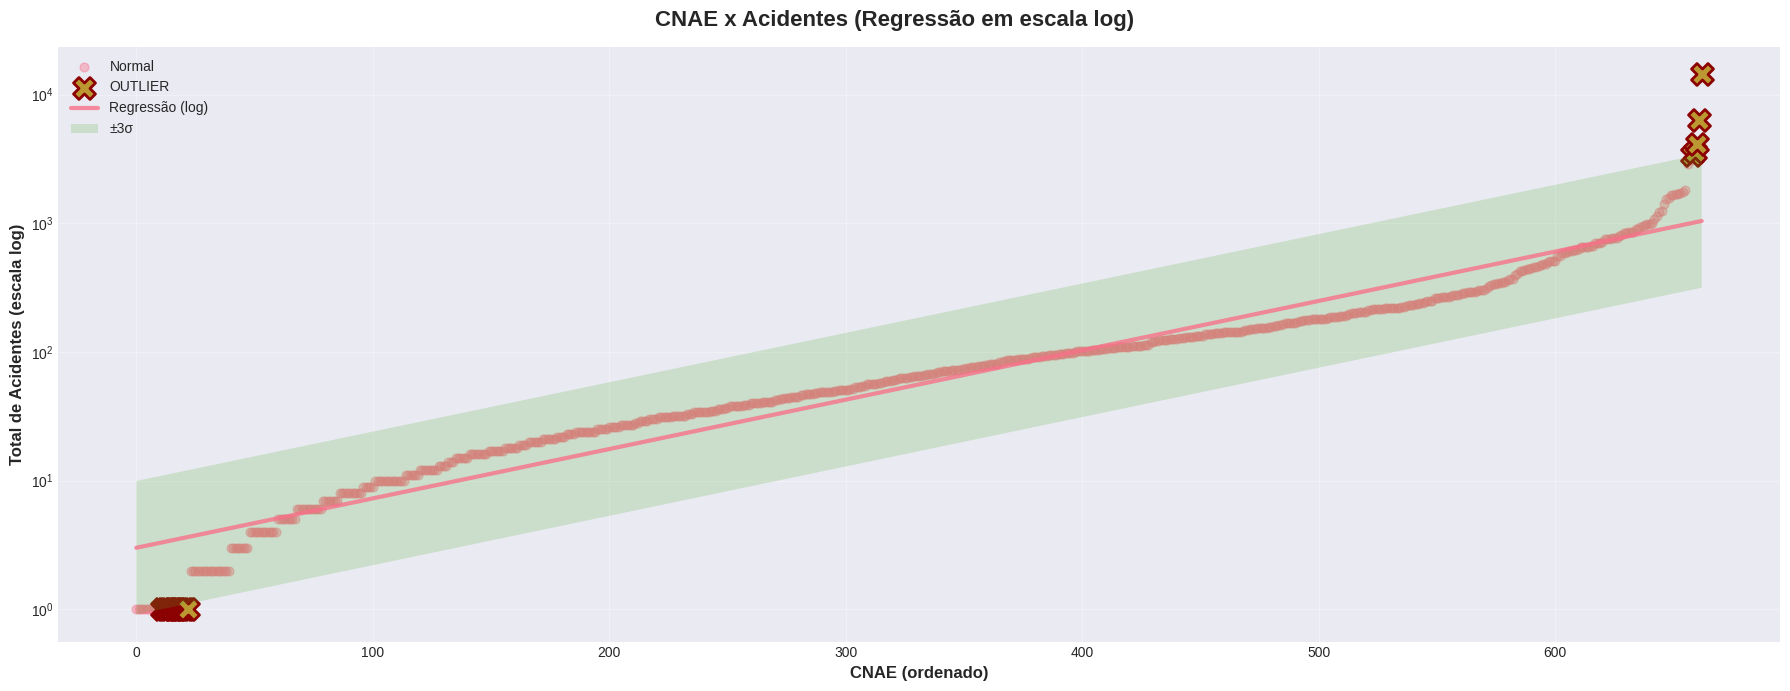

In [33]:
fig, ax = plt.subplots(figsize=(18, 7))
fig.suptitle('CNAE x Acidentes (Regressão em escala log)',
             fontsize=16, fontweight='bold')

ax.scatter(
    X_cnae[~outliers_cnae], y_cnae[~outliers_cnae],
    alpha=0.4, s=40, label='Normal'
)
ax.scatter(
    X_cnae[outliers_cnae], y_cnae[outliers_cnae],
    alpha=1, s=250, marker='X',
    label='OUTLIER', edgecolors='darkred', linewidths=2
)

y_log = np.log(y_cnae)
model_cnae = LinearRegression()
model_cnae.fit(X_cnae, y_log)

y_pred_log = model_cnae.predict(X_cnae)
y_pred = np.exp(y_pred_log)

ax.plot(
    X_cnae, y_pred,
    linewidth=3, label='Regressão (log)', alpha=0.8
)

res_log = y_log - y_pred_log
std_log = res_log.std()

ax.fill_between(
    X_cnae.ravel(),
    np.exp(y_pred_log - 3*std_log),
    np.exp(y_pred_log + 3*std_log),
    alpha=0.2, label='±3σ'
)

ax.set_xlabel('CNAE (ordenado)', fontweight='bold', fontsize=12)
ax.set_ylabel('Total de Acidentes (escala log)', fontweight='bold', fontsize=12)
ax.set_yscale('log')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Análise Demográfica
Nessa análise vamos entender as características demográficas das pessoas que sofreram acidentes, como sexo, idade, localização e ocorrência de óbitos.

Os gráficos mostram que a maioria dos acidentes ocorre com pessoas do sexo masculino (63,9%), a faixa etária mais afetada está entre 20 e 30 anos, São Paulo concentra mais de 50 mil casos seguido por Minas Gerais e Rio Grande do Sul, e a grande maioria dos acidentes não resulta em óbito o que justifica a retirada dessa coluna em um tratamento dos dados.



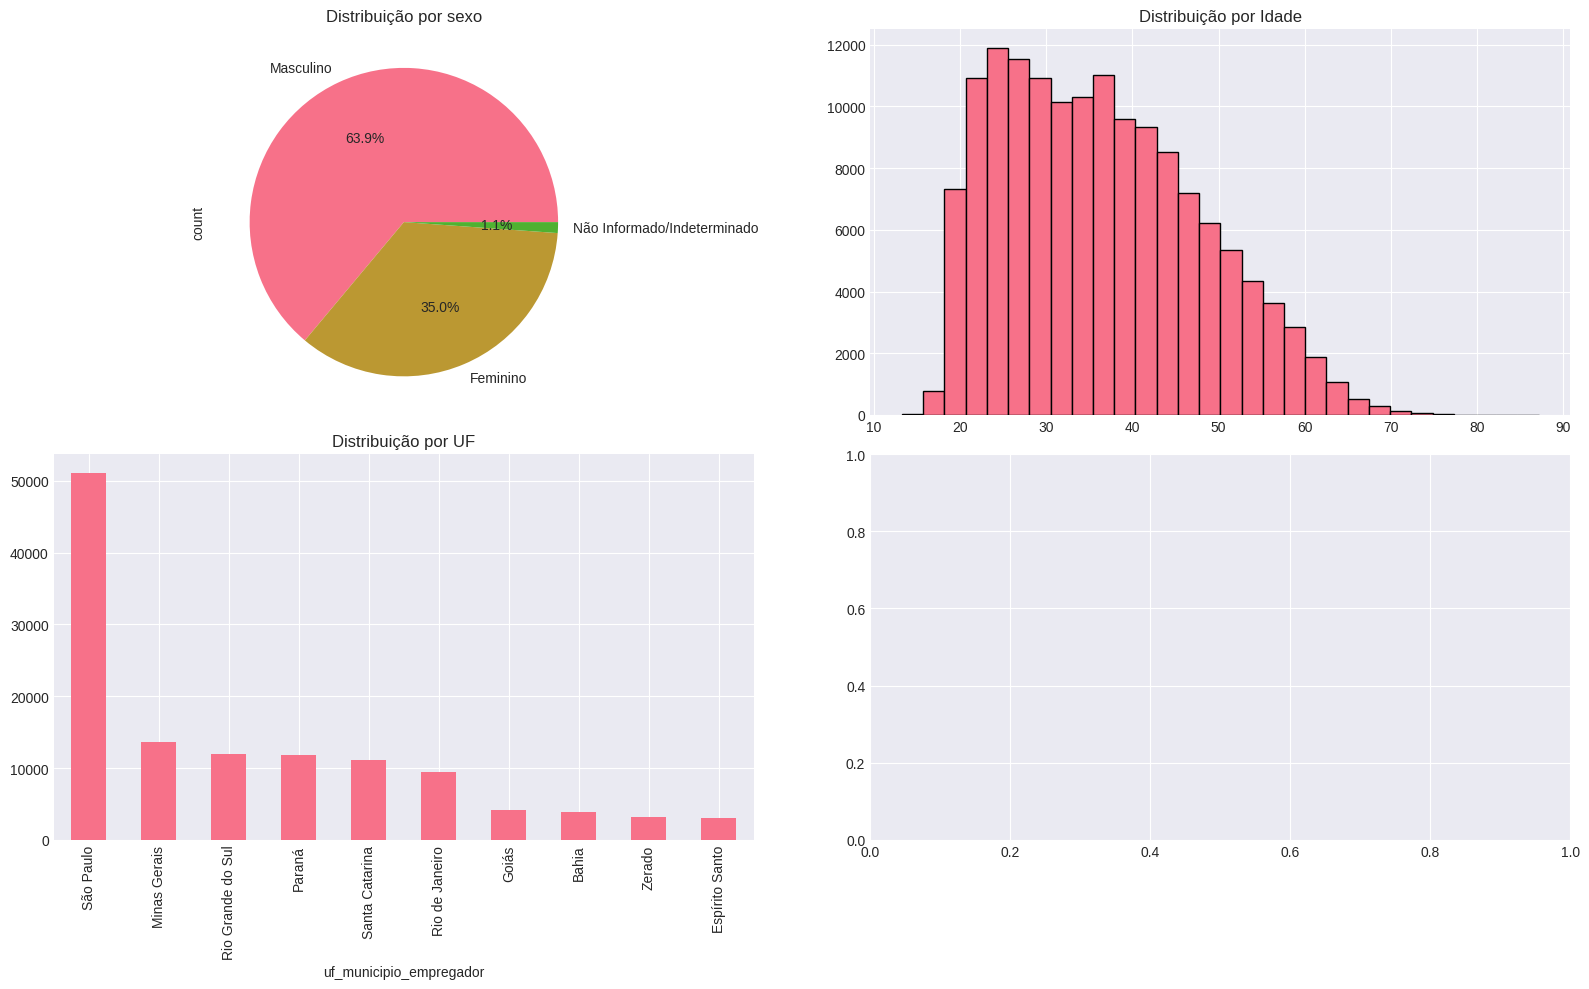

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

df['sexo'] = df['sexo'].replace(['Indeterminado', 'Não Informado'], 'Não Informado/Indeterminado')
df['sexo'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title("Distribuição por sexo")

df['Idade'].hist(bins=30, ax=axes[0,1], edgecolor='black')
axes[0,1].set_title("Distribuição por Idade")

df['uf_municipio_empregador'].value_counts().head(10).plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title("Distribuição por UF")

plt.tight_layout()
plt.show()

A regressão linear mostrou um R^2 de 0.38 e um coeficiente angular de -0,22, indicando uma tendência de diminuição na frequência de acidentes conforme a idade aumenta. Foram identificados 91 outliers em contraste com os 325 na analise com os dados brutos, sendo a maioria idades entre 13 e 16 anos com frequência muito baixa de acidentes, o que é esperado já que essas idades estão abaixo da idade mínima para trabalho formal.

In [36]:
idade_freq = df.groupby('Idade').size().reset_index(name='num_acidentes')
idade_freq = idade_freq.dropna()

X = idade_freq['Idade'].values.reshape(-1, 1)
y = idade_freq['num_acidentes'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

residuos = y - y_pred
residuos_padronizados = (residuos - residuos.mean()) / residuos.std()

# Detectar outliers (resíduo > 3 desvios padrão)
threshold = 3
outliers_mask = np.abs(residuos_padronizados) > threshold
outliers_idx = idade_freq[outliers_mask].index

print(f'R^2 do modelo: {model.score(X, y):.4f}')
print(f'Coeficiente angular: {model.coef_[0]:.4f}')
print(f'\n Outliers: {outliers_mask.sum()} pontos')
print(f'Critério: |resíduo padronizado| > {threshold}')

if outliers_mask.sum() > 0:
    print('\nIdades com frequência ANORMAL:')
    print(idade_freq[outliers_mask][['Idade', 'num_acidentes']].to_string(index=False))

R^2 do modelo: 0.3426
Coeficiente angular: -0.2038

 Outliers: 91 pontos
Critério: |resíduo padronizado| > 3

Idades com frequência ANORMAL:
    Idade  num_acidentes
13.248460              1
14.255989              1
14.329911              1
14.409309              1
14.800821              1
14.822724              1
14.937714              1
15.115674              1
15.154004              1
15.170431              1
15.230664              1
15.244353              1
15.285421              1
15.296372              1
15.318275              1
15.359343              1
15.362081              1
15.408624              1
15.485284              1
15.529090              1
15.572895              1
15.597536              1
15.600274              1
15.616701              1
15.655031              1
15.657769              1
15.687885              1
15.690623              1
15.696099              1
15.704312              1
15.731691              1
15.764545              1
15.819302              1
15.849418

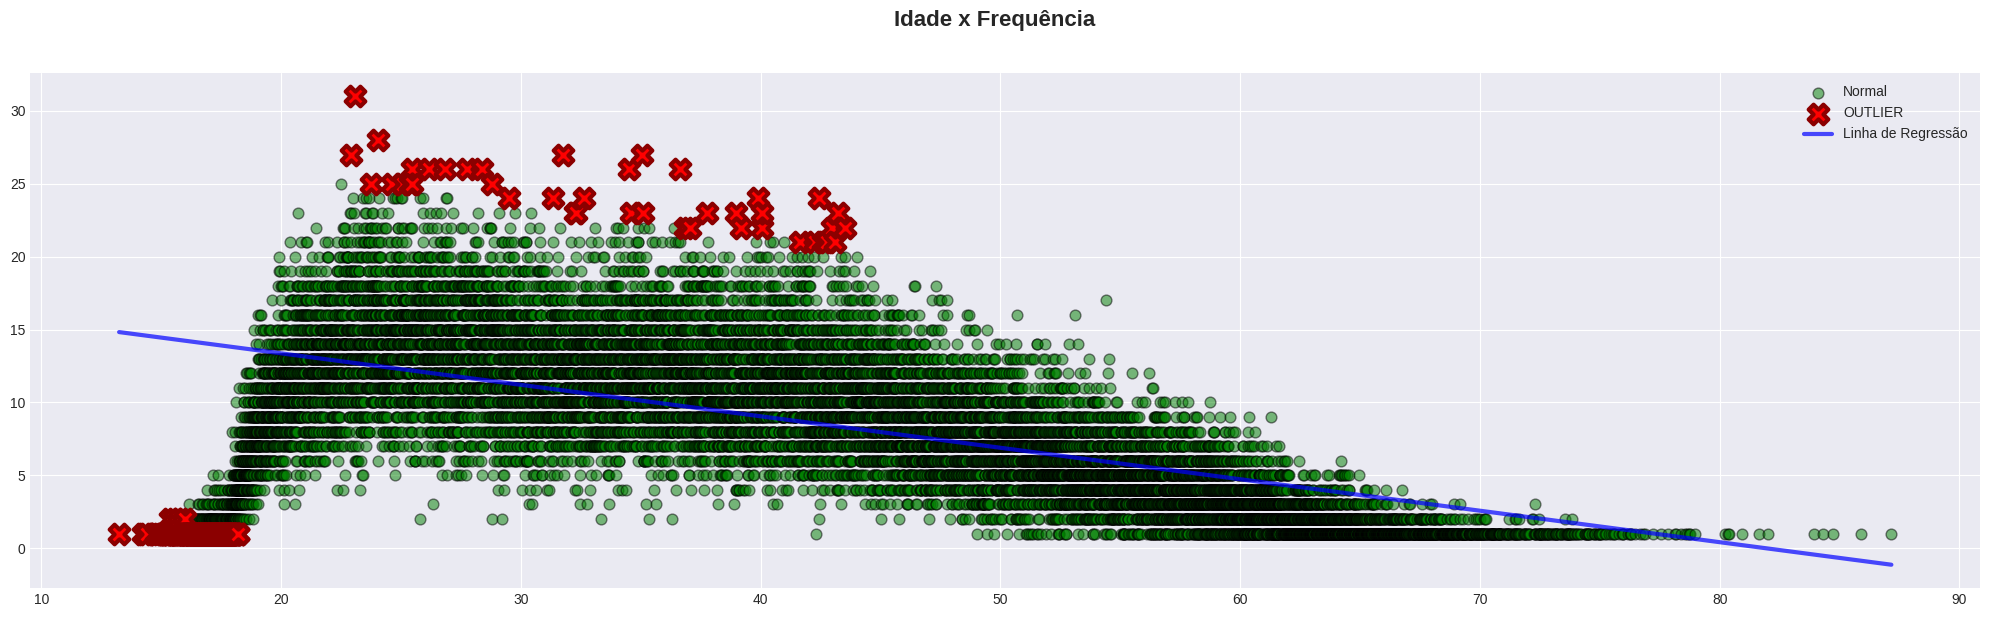

In [25]:
fig, axes = plt.subplots(figsize=(20, 6))

fig.suptitle('Idade x Frequência',
             fontsize=16, fontweight='bold', y=1.02)

axes.scatter(X[~outliers_mask], y[~outliers_mask],
             alpha=0.5, s=60,
             color='green', label='Normal',
             edgecolors='black')

axes.scatter(X[outliers_mask], y[outliers_mask],
             alpha=1, s=200,
             color='red', marker='X',
             label='OUTLIER',
             edgecolors='darkred', linewidths=3)

axes.plot(X, y_pred,
          'b-', linewidth=3,
          label='Linha de Regressão', alpha=0.7)

axes.legend()
plt.tight_layout()
plt.show()


## Conclusões

A análise dos dados de acidentes de trabalho revelou padrões importantes que se mantiveram consistentes após o processo de ETL, com apenas pequenas variações percentuais.

Nas correlações entre variáveis categóricas, o V de Cramér revelou associação moderada entre tipo de acidente e natureza da lesão (V = 0,499) e entre tipo de acidente e parte do corpo atingida (V = 0,430). Destaca-se que o sexo apresentou associação muito fraca com todas as outras variáveis (V entre 0,065 e 0,147), indicando que homens e mulheres sofrem tipos similares de acidentes quando expostos aos mesmos riscos. 

O processo ETL foi fundamental para a qualidade dos dados: embora os padrões gerais tenham se mantido estáveis, a padronização das datas, remoção de inconsistências e tratamento de outliers permitiram identificar insights mais precisos e confiáveis, especialmente na redução de 72% (de 325 para 91) dos outliers demográficos.


